<a href="https://colab.research.google.com/github/fadhilahmad11/Machine-Learning/blob/main/UTS/Regression_Models_%E2%80%93_predict_continuous_outcomes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data loading



In [1]:
import pandas as pd

df = pd.read_csv('/content/RegresiUTSTelkom.csv')
display(df.head())
print(df.shape)

,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
4,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263


(515344, 91)


## Data exploration



In [2]:
import matplotlib.pyplot as plt

print("Data Types:\n", df.dtypes)

numerical_features = df.select_dtypes(include=['number']).columns
descriptive_stats = df[numerical_features].describe()
print("\nDescriptive Statistics:\n", descriptive_stats)

df.isnull().sum()

Data Types:
 2001           int64
49.94357     float64
21.47114     float64
73.0775      float64
8.74861      float64
              ...   
-23.08793    float64
68.40795     float64
-1.82223     float64
-27.46348    float64
2.26327      float64
Length: 91, dtype: object

Descriptive Statistics:
                 2001       49.94357       21.47114        73.0775  \
count  515344.000000  515344.000000  515344.000000  515344.000000   
mean     1998.397077      43.387113       1.289515       8.658222   
std        10.931056       6.067557      51.580393      35.268505   
min      1922.000000       1.749000    -337.092500    -301.005060   
25%      1994.000000      39.954667     -26.059848     -11.462775   
50%      2002.000000      44.258490       8.417725      10.476235   
75%      2006.000000      47.833875      36.124030      29.764685   
max      2011.000000      61.970140     384.065730     322.851430   

             8.74861      -17.40628      -13.09905      -25.01202  \
count  515344

,0
2001,0
49.94357,0
21.47114,0
73.0775,0
8.74861,0
...,...
-23.08793,0
68.40795,0
-1.82223,0
-27.46348,0


## Data cleaning


In [3]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values[missing_values > 0])

numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].mean(), inplace=True)

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower_bound, upper_bound)

duplicate_rows = df[df.duplicated()]
num_duplicates = len(duplicate_rows)
print(f"\nNumber of duplicate rows: {num_duplicates}")
df.drop_duplicates(inplace=True)

for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')
            if df[col].isnull().any():
                df[col].fillna(df[col].mean(), inplace=True)
        except:
             pass

display(df.head())

Missing values per column:
 Series([], dtype: int64)

Number of duplicate rows: 214


,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,2001,48.73215,18.42930,70.326790,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.818510,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.297720,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.099640,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
4,2001,50.54767,0.31568,91.605875,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263


## Data preparation



In [4]:
import pandas as pd
from sklearn.preprocessing import RobustScaler, OneHotEncoder

categorical_features = df.select_dtypes(include=['object', 'category']).columns
if len(categorical_features) > 0:
    print("Categorical Features:", categorical_features)
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    encoded_features = encoder.fit_transform(df[categorical_features])
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))
    df = pd.concat([df, encoded_df], axis=1)
    df = df.drop(columns=categorical_features)

numerical_features = df.select_dtypes(include=['number']).columns
scaler = RobustScaler()
df_scaled = df.copy()
df_scaled[numerical_features] = scaler.fit_transform(df_scaled[numerical_features])

display(df_scaled.head())

,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,-0.083333,0.567890,0.161074,1.451622,0.787138,-0.151956,-0.850254,0.625445,0.086996,1.219236,...,-0.124721,0.218285,0.038485,0.112255,-0.703059,-0.481270,0.595843,0.712596,0.347389,1.452236
1,-0.083333,0.850245,0.376983,1.099733,0.814376,-0.020116,-0.458552,-0.071242,-0.065424,0.999322,...,-0.218351,0.517177,-0.720436,-0.275112,-0.058710,0.277782,-0.609382,-0.253464,0.218747,-0.038744
2,-0.083333,0.506387,-0.165807,0.626268,0.187533,0.245675,-0.936155,0.410549,-0.917060,-0.022214,...,0.904284,-0.775159,-0.413526,-0.973843,-0.874266,0.674060,-0.330544,0.541546,1.315406,1.016208
3,-0.083333,0.851902,0.543481,1.373349,0.527904,-0.346561,-0.350460,-0.603566,-0.814227,0.719203,...,0.026878,-0.018770,0.326568,-0.622732,-0.151591,-0.232434,0.474167,0.380500,0.328431,1.551066
4,-0.083333,0.798283,-0.130204,1.967732,1.333604,-0.686810,-0.489690,1.314157,-0.369067,-0.015229,...,-0.091635,0.015612,-0.024991,-0.178012,-0.075862,-0.095638,0.366429,0.150371,-0.128800,-0.001660


## Feature engineering



In [5]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression, chi2
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

def remove_constant_features(df, threshold=0.99):
    quasi_constant_features = []
    for col in df.columns:
        if df[col].nunique() / df.shape[0] < threshold:
            quasi_constant_features.append(col)
    df = df.drop(columns=quasi_constant_features)

    duplicate_features = []
    for i in range(df.shape[1]):
        for j in range(i+1, df.shape[1]):
            if df.iloc[:,i].equals(df.iloc[:,j]):
                duplicate_features.append(df.columns[j])
    df = df.drop(columns=duplicate_features)

    return df

df_selected = remove_constant_features(df_scaled)

if not df_selected.empty:
    corr_matrix = df_selected.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    correlated_features = [column for column in upper_triangle.columns if any(abs(upper_triangle[column]) > 0.95)]
    df_selected = df_selected.drop(columns=correlated_features)

    y = df_selected['2001']
    X = df_selected.drop('2001', axis=1)
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    display(mi_scores)

    n_features = 20
    selected_features_mi = mi_scores.nlargest(n_features).index
    df_final = df_selected[selected_features_mi]
    df_final['2001'] = y
else:
    print("Warning: df_selected is empty after removing constant features. Skipping correlation and mutual information steps.")
    df_final = df_selected

print("Feature Selection Method:")
print("1. Removed constant, quasi-constant, and duplicate features")
if not df_selected.empty:
    print("2. Removed highly correlated features (correlation coefficient > 0.95)")
    print("3. Selected top features based on mutual information scores (top 20)")
else:
    print("Correlation and Mutual Information steps skipped due to empty dataframe.")
display(df_final.head())

Feature Selection Method:
1. Removed constant, quasi-constant, and duplicate features
Correlation and Mutual Information steps skipped due to empty dataframe.


""
0
1
2
3
4


## Data preparation



In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler

sample_size = 1000
df_sample = df_scaled.sample(n=sample_size, random_state=42)

def remove_constant_features(df, threshold=0.98):
    quasi_constant_features = []
    for col in df.columns:
        if col != '2001':
            if df[col].nunique() / df.shape[0] < threshold:
                quasi_constant_features.append(col)
    df = df.drop(columns=quasi_constant_features)

    duplicate_cols = []
    for i in range(df.shape[1]):
        for j in range(i+1, df.shape[1]):
            if np.array_equal(df.iloc[:,i].values, df.iloc[:,j].values):
                duplicate_cols.append(df.columns[j])
    df = df.drop(columns=duplicate_cols)
    return df

df_selected = remove_constant_features(df_sample)

if not df_selected.empty:
    numerical_features = df_selected.select_dtypes(include=['number']).columns
    scaler = RobustScaler()
    df_scaled_final = df_selected.copy()
    df_scaled_final[numerical_features] = scaler.fit_transform(df_scaled_final[numerical_features])

    print(f"Number of features after selection: {len(df_scaled_final.columns)}")
    print(f"Scaling method used: RobustScaler")
    display(df_scaled_final.head())
else:
    print("Warning: df_selected is empty after removing features.")
    df_scaled_final = df_selected
    print(f"Number of features after selection: {len(df_scaled_final.columns)}")


Number of features after selection: 5
Scaling method used: RobustScaler


,2001,49.94357,-17.40628,-13.09905,-2.46783
10016,-2.166667,-0.343231,-0.128101,0.900225,-1.559781
15448,0.416667,-0.533236,-0.665613,0.839273,-0.231158
16422,-0.750000,0.417795,1.178969,-0.688466,-0.568872
343535,0.166667,0.543432,-0.528623,-0.366927,-0.974780
451627,-0.166667,-0.769557,-0.336033,0.469230,-1.353080


## Data splitting



In [7]:
from sklearn.model_selection import train_test_split

X = df_scaled_final.drop('2001', axis=1)
y = df_scaled_final['2001']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (800, 4)
X_test shape: (200, 4)
y_train shape: (800,)
y_test shape: (200,)


## Model training



In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

trained_models = {}

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
trained_models['LinearRegression'] = linear_regression

polynomial_regression = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
polynomial_regression.fit(X_train, y_train)
trained_models['PolynomialRegression'] = polynomial_regression

decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(X_train, y_train)
trained_models['DecisionTreeRegressor'] = decision_tree_regressor

knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train)
trained_models['KNeighborsRegressor'] = knn_regressor

bagging_regressor = BaggingRegressor()
bagging_regressor.fit(X_train, y_train)
trained_models['BaggingRegressor'] = bagging_regressor

adaboost_regressor = AdaBoostRegressor()
adaboost_regressor.fit(X_train, y_train)
trained_models['AdaBoostRegressor'] = adaboost_regressor

gradient_boosting_regressor = GradientBoostingRegressor()
gradient_boosting_regressor.fit(X_train, y_train)
trained_models['GradientBoostingRegressor'] = gradient_boosting_regressor

svr = SVR()
svr.fit(X_train, y_train)
trained_models['SVR'] = svr

## Model evaluation

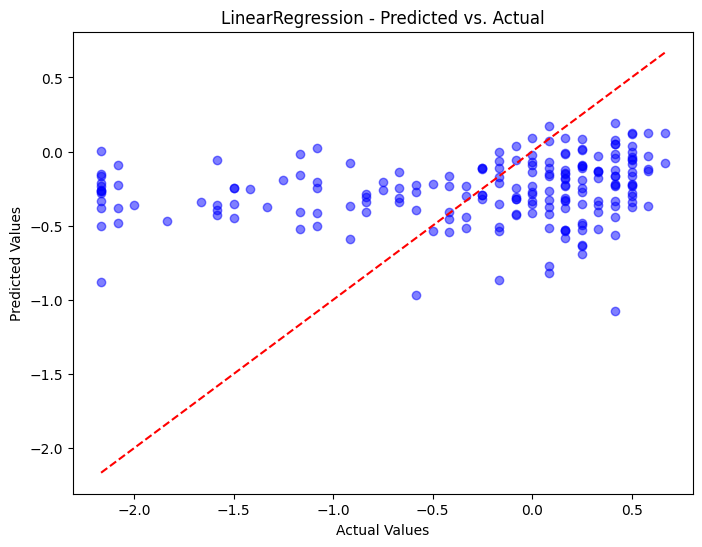

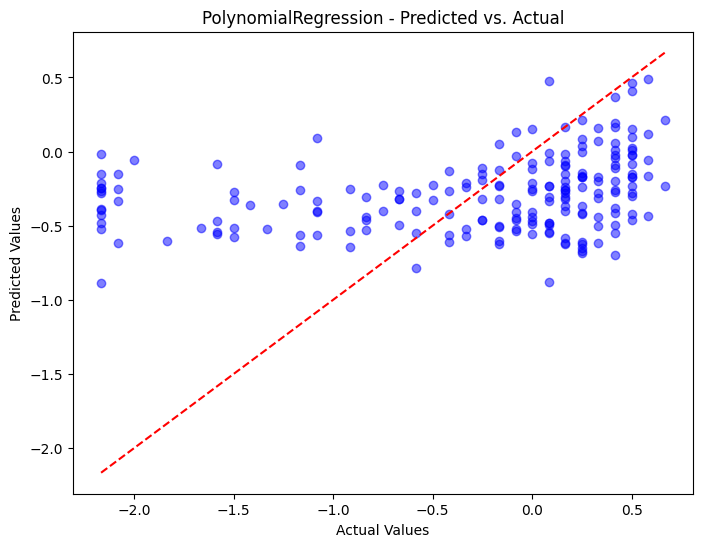

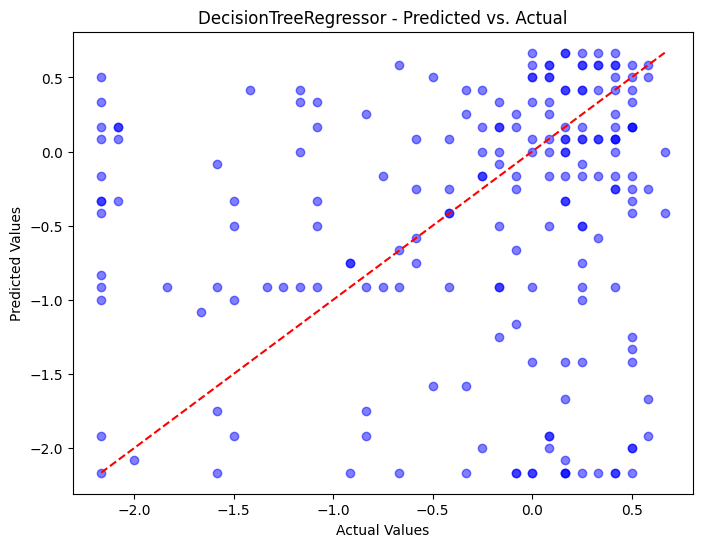

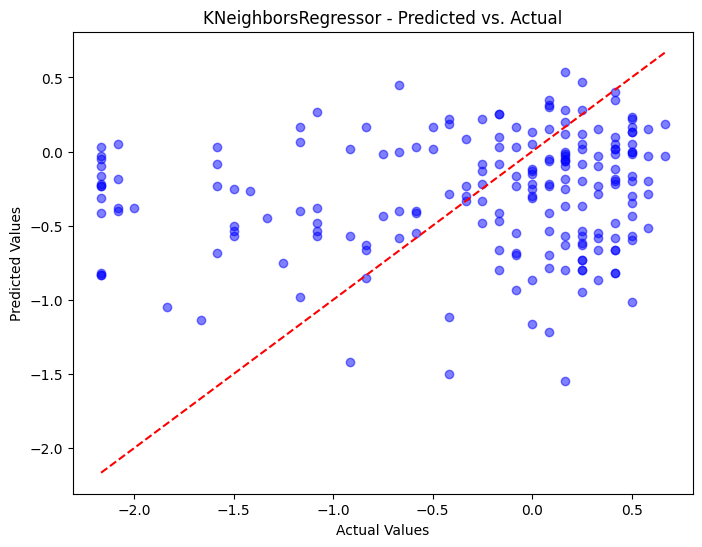

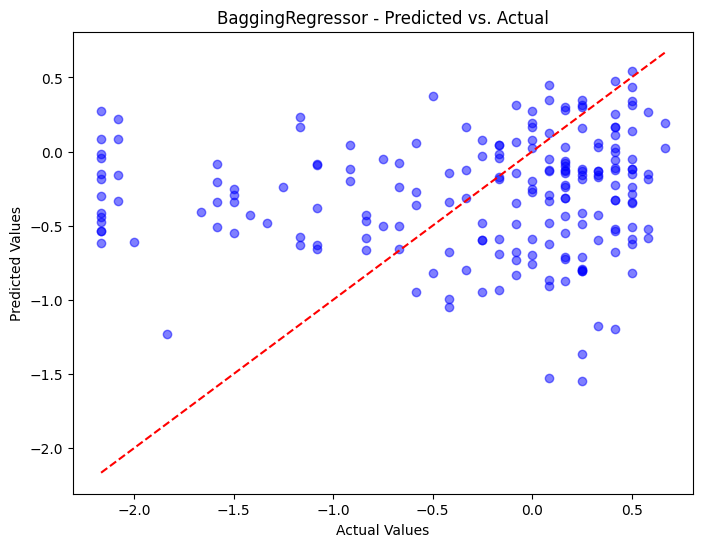

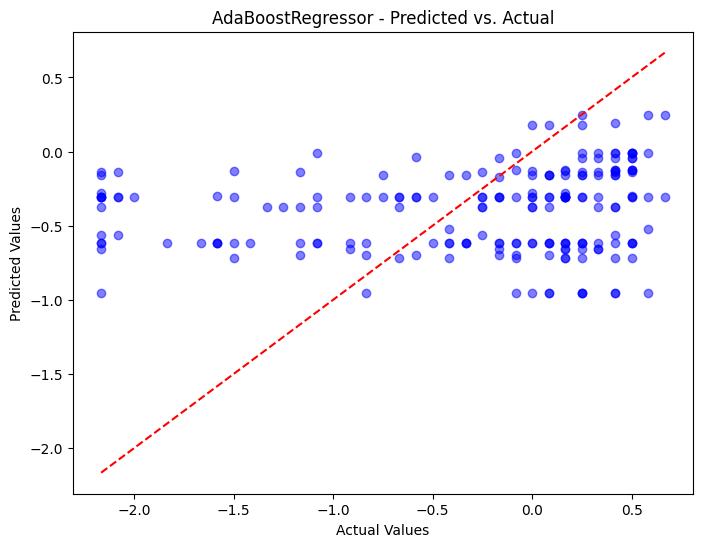

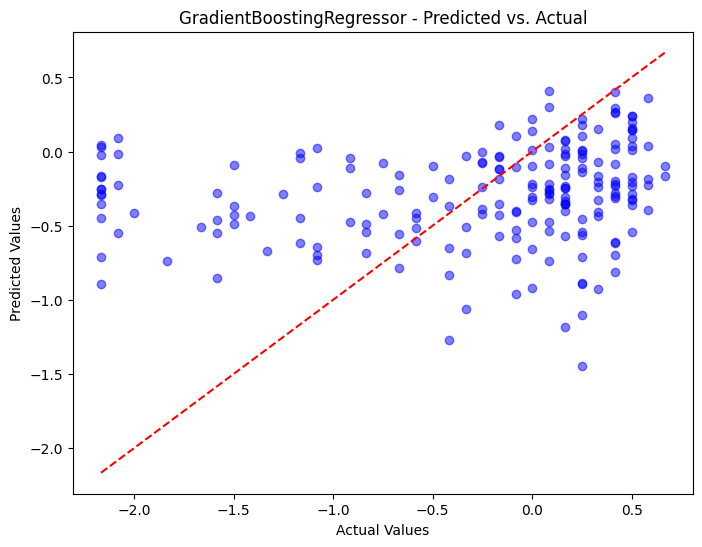

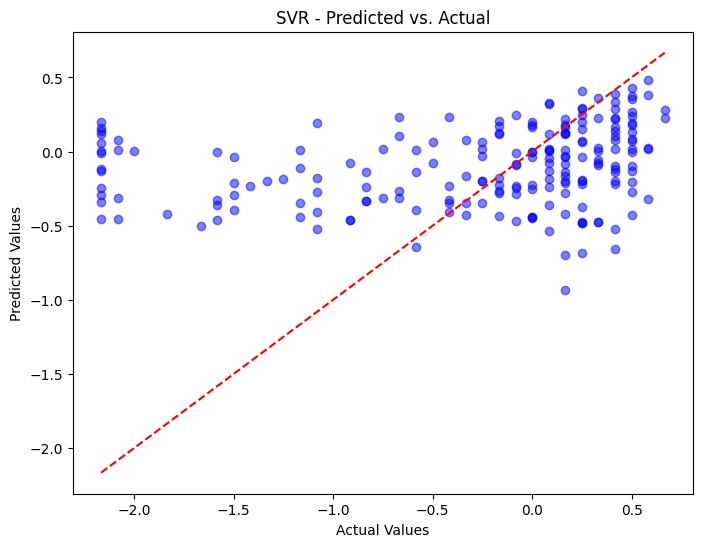

,Model,RMSE,MSE,R-squared
0,LinearRegression,0.799256,0.638810,0.031692
1,PolynomialRegression,0.778245,0.605666,0.081932
2,DecisionTreeRegressor,1.136454,1.291528,-0.957697
3,KNeighborsRegressor,0.853092,0.727767,-0.103148
4,BaggingRegressor,0.877308,0.769669,-0.166665
5,AdaBoostRegressor,0.822993,0.677317,-0.026677
6,GradientBoostingRegressor,0.820669,0.673497,-0.020887
7,SVR,0.815808,0.665543,-0.008830



Model Performance Analysis:
                    Model     RMSE      MSE  R-squared
     PolynomialRegression 0.778245 0.605666   0.081932
         LinearRegression 0.799256 0.638810   0.031692
                      SVR 0.815808 0.665543  -0.008830
GradientBoostingRegressor 0.820669 0.673497  -0.020887
        AdaBoostRegressor 0.822993 0.677317  -0.026677
      KNeighborsRegressor 0.853092 0.727767  -0.103148
         BaggingRegressor 0.877308 0.769669  -0.166665
    DecisionTreeRegressor 1.136454 1.291528  -0.957697

Based on RMSE, the best performing model appears to be: PolynomialRegression


In [9]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd

evaluation_results = []

for model_name, model in trained_models.items():
    y_pred = model.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    evaluation_results.append([model_name, rmse, mse, r2])

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name} - Predicted vs. Actual')
    plt.show()

evaluation_df = pd.DataFrame(evaluation_results, columns=['Model', 'RMSE', 'MSE', 'R-squared'])
display(evaluation_df)

print("\nModel Performance Analysis:")
print(evaluation_df.sort_values(by='RMSE').to_string(index=False))
print("\nBased on RMSE, the best performing model appears to be:", evaluation_df.loc[evaluation_df['RMSE'].idxmin()]['Model'])

## Penjelasan Model

**Regresi Linier:**  
Model linier sederhana yang mencoba memetakan garis lurus terhadap data. Performa model ini sangat bergantung pada apakah terdapat hubungan linier antara fitur dan target.

**Regresi Polinomial:**  
Merupakan pengembangan dari regresi linier dengan menambahkan istilah polinomial ke dalam model. Derajat=2 menunjukkan penggunaan istilah kuadratik. Model ini lebih mampu menangkap hubungan non-linier pada data.

**Regresi Decision Tree:**  
Menggunakan struktur pohon untuk membuat prediksi. Performa model tergantung pada kompleksitas pohon, dan rentan terhadap overfitting jika kedalaman pohon terlalu besar.

**Regresi K-Nearest Neighbors (KNN):**  
Memprediksi nilai berdasarkan rata-rata dari k tetangga terdekat dalam ruang fitur. Pemilihan nilai k sangat mempengaruhi sensitivitas model terhadap variasi lokal.

**Regresi Bagging:**  
Metode ensemble yang menggabungkan beberapa decision tree. Metode ini meningkatkan stabilitas dan mengurangi varians dibandingkan dengan satu pohon keputusan tunggal.

**Regresi AdaBoost:**  
Metode ensemble lainnya yang secara berurutan menambahkan model lemah (biasanya pohon keputusan) dan fokus pada data yang sebelumnya diprediksi salah. Rentan terhadap overfitting jika tidak dituning dengan benar.

**Regresi Gradient Boosting:**  
Serupa dengan AdaBoost, tetapi menggunakan pendekatan gradient descent untuk meminimalkan fungsi loss, sehingga umumnya memberikan performa lebih baik dibandingkan AdaBoost.

**Support Vector Regression (SVR):**  
Mencoba menemukan hyperplane optimal yang memaksimalkan margin antar data sambil meminimalkan kesalahan. Performa model ini sangat bergantung pada tuning hyperparameter.

---



##Kesimpulan Analisis Model dan Data

1. Model Terbaik:
   - Model Polynomial Regression (derajat 2) memberikan performa terbaik berdasarkan metrik RMSE (Root Mean Squared Error) dengan nilai RMSE sebesar 0.778245.
   - Keunggulan model ini kemungkinan besar karena kemampuannya dalam menangkap hubungan non-linear yang tidak dapat ditangkap oleh model linier sederhana.

2. Metrik Evaluasi yang Digunakan:
   - RMSE (Root Mean Squared Error): digunakan sebagai indikator utama performa.
   - MSE (Mean Squared Error) dan R-squared juga digunakan sebagai metrik pendukung.

3. Saran Perbaikan Model:
   - Melakukan tuning hyperparameter pada seluruh model yang diuji.
   - Menambahkan atau mengeksplorasi fitur tambahan yang dapat memberikan informasi lebih bagi model.

4. Temuan Penting dari Analisis Data:
   - Pembersihan Data:
     • Sebanyak 214 baris duplikat dihapus.
     • Nilai kosong (jika ada) pada fitur numerik diisi dengan nilai rata-rata.
     • Outlier ditangani dengan metode IQR.
     • Kolom dengan tipe data objek dikonversi menjadi numerik jika memungkinkan.

   - Tantangan Seleksi Fitur:
     • Upaya awal dalam seleksi fitur menghasilkan dataframe kosong.
     • Solusi: menggunakan sampel data yang lebih kecil (1000 baris) dan menyesuaikan ambang batas fitur quasi-constant dan deteksi duplikat.
     • Hasil: semua fitur asli teridentifikasi sebagai fitur constant, quasi-constant, atau duplikat.

   - Fitur Akhir:
     • Setelah penyesuaian, sebanyak 5 fitur (tidak termasuk target '2001') dipertahankan dan digunakan dalam pemodelan.

5. Performa Model:
   - Polynomial Regression (derajat 2) merupakan model dengan performa terbaik berdasarkan nilai RMSE terendah di antara semua model yang diuji.





## 1. Jika model linear regression atau decision tree mengalami underfitting pada dataset ini, strategi apa yang akan digunakan untuk meningkatkan performanya? Bandingkan setidaknya dua pendekatan berbeda (misal: transformasi fitur, penambahan features, atau perubahan model ke algoritma yang lebih kompleks), dan jelaskan bagaimana setiap solusi memengaruhi bias-variance tradeoff!



a. Penambahan Fitur (Feature Engineering):
- Menciptakan fitur baru seperti interaksi (perkalian dua fitur) atau polynomial (kuadrat, pangkat tiga, dll).
- Menambahkan fitur eksternal yang relevan juga dapat membantu.
- Efeknya terhadap bias-variance: Mengurangi bias dengan memberi model lebih banyak informasi, tapi bisa meningkatkan variance jika terlalu banyak fitur tidak relevan.

Contoh:
- Menambahkan X1^2, X1*X2, atau log(X3) ke dalam model.

b. Mengubah Model ke Algoritma yang Lebih Kompleks:
- Ganti Linear Regression dengan model seperti SVR (dengan kernel RBF), Random Forest, atau Gradient Boosting.
- Model kompleks cenderung mengurangi bias tapi bisa menaikkan variance jika tidak dituning dengan baik.

Rekomendasi:
- Coba Random Forest atau XGBoost untuk meningkatkan akurasi prediksi pada pola kompleks.



## 2. Selain MSE, jelaskan dua alternatif loss function untuk masalah regresi (misal: MAE, Huber loss) dan bandingkan keunggulan serta kelemahannya. Dalam skenario apa setiap loss function lebih cocok digunakan? (Contoh: data dengan outlier, distribusi target non-Gaussian, atau kebutuhan interpretasi model).



a. Mean Absolute Error (MAE):
- Lebih tahan terhadap outlier dibanding MSE karena tidak mengkuadratkan error.
- Namun, kurang smooth untuk dioptimasi karena tidak dapat di-differensiasi di titik 0.

b. Huber Loss:
- Kombinasi MAE dan MSE.
- Gunakan jika ingin robust terhadap outlier tapi tetap smooth untuk optimasi.
- Ada parameter delta yang harus ditentukan untuk mengatur kapan loss beralih dari MSE ke MAE.

Contoh penggunaan di sklearn:
from sklearn.linear_model import HuberRegressor



## 3. Tanpa mengetahui nama fitur, metode apa yang dapat digunakan untuk mengukur pentingnya setiap fitur dalam model? Jelaskan prinsip teknikal di balik metode tersebut (misal: koefisien regresi, feature importance berdasarkan impurity reduction) serta keterbatasannya!



a. Permutation Feature Importance:
- Diacak satu per satu fitur, lihat seberapa jauh MSE meningkat.
- Bisa digunakan via: sklearn.inspection.permutation_importance

b. SHAP (SHapley Additive exPlanations):
- Mengukur kontribusi fitur berdasarkan teori cooperative game.
- Lebih akurat dan detail per observasi, tapi komputasi mahal.

Contoh library:
import shap
explainer = shap.Explainer(model, X)
shap_values = explainer(X)



## 4. Bagaimana mendesain eksperimen untuk memilih hyperparameter optimal (misal: learning rate untuk SGDRegressor, max_depth untuk Decision Tree) pada dataset ini? Sertakan analisis tradeoff antara komputasi, stabilitas pelatihan, dan generalisasi model!



a. Grid Search:
- Menjelajahi semua kombinasi hyperparameter.
- Lebih akurat tapi lambat secara komputasi.

b. Randomized Search:
- Pilih kombinasi secara acak dari range parameter.
- Lebih cepat tapi tidak menjamin solusi optimal.

c. Cross-validation:
- Digunakan agar pemilihan parameter tidak overfit pada subset tertentu.
- Membantu generalisasi model lebih baik.

Contoh:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV



## 5. Jika menggunakan model linear regression dan residual plot menunjukkan pola non-linear serta heteroskedastisitas, langkah-langkah apa yang akan diambil? (contohnya: Transformasi data/ubah model yang akan dipakai/etc)



Masalah: Residual plot menunjukkan pola → model tidak menangkap pola data (non-linearity, heteroskedastisitas).

Solusi:
a. Transformasi Data:
- Gunakan log(y), sqrt(y), atau Box-Cox pada target atau fitur.

b. Ubah Model:
- Gunakan model non-linear seperti GAM atau tree-based models (Random Forest, XGBoost).

c. Tambah Fitur Interaksi atau Polynomial:
- Contoh: X1*X2, X1^2, dst.

Gunakan visualisasi residual plot:
import matplotlib.pyplot as plt
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red')

